### Práctica: Respuestas de un circuito eléctrico de segundo orden.

**Objetivo:** Modelar un circuito eléctrico de segundo orden mediante el análisis de mallas para obtener su función de transferencia. Simular la respuesta del sistema ante una entrada escalón, analizando y comparando los casos de respuesta subamortiguada, críticamente amortiguada y sobreamortiguada a través de la modificación de los parámetros del circuito y la ubicación de los polos del sistema.


---

#### Paso 1: Planteamiento del sistema.

Para nuestro análisis, utilizaremos un circuito RLC de dos mallas. La entrada será el voltaje de la fuente, $V_{in}(t)$, y la salida será el voltaje en la resistencia $R_2$, que denotaremos como $V_{out}(t)$.

![Diagrama del circuito eléctrico.](assets/images/P_2_02_Diagrama.png)

*Figura 1. Diagrama eléctrico del circuito.*

---

#### Paso 2: Obtención de la Función de Transferencia.

Realizaremos el análisis de mallas directamente en el dominio de Laplace, asumiendo condiciones iniciales iguales a cero. Las impedancias de los componentes son $R_1$, $R_2$, $sL$ y $\frac{1}{sC}$.

Aplicamos la Ley de Voltajes de Kirchhoff (LVK) a cada malla:

**Ecuación de la Malla 1:**
$$ V_{in}(s) = (R_1 + \frac{1}{sC})I_1(s) - \frac{1}{sC}I_2(s) \quad \dots (1) $$

**Ecuación de la Malla 2:**
$$ 0 = -\frac{1}{sC}I_1(s) + (R_2 + sL + \frac{1}{sC})I_2(s) \quad \dots (2) $$

La salida del sistema es $V_{out}(s) = R_2 I_2(s)$. Nuestro objetivo es encontrar la función de transferencia $G(s) = \frac{V_{out}(s)}{V_{in}(s)}$. 

Para ello, necesitamos resolver el sistema de ecuaciones para $I_2(s)$. Utilizando la regla de Cramer, obtenemos:
$$ I_2(s) = \frac{\begin{vmatrix} R_1 + \frac{1}{sC} & V_{in}(s) \\ -\frac{1}{sC} & 0 \end{vmatrix}}{\begin{vmatrix} R_1 + \frac{1}{sC} & -\frac{1}{sC} \\ -\frac{1}{sC} & R_2 + sL + \frac{1}{sC} \end{vmatrix}} = \frac{\frac{1}{sC}V_{in}(s)}{(R_1 + \frac{1}{sC})(R_2 + sL + \frac{1}{sC}) - (\frac{1}{sC})^2} $$

Desarrollando el denominador:
$$ (R_1 + \frac{1}{sC})(R_2 + sL + \frac{1}{sC}) - (\frac{1}{sC})^2$$
$$ = R_1R_2 + sL R_1 + \frac{R_1}{sC} + \frac{R_2}{sC} + \frac{L}{C} + \frac{1}{s^2 C^2} - \frac{1}{s^2 C^2}$$
$$ = sLR_1 + R_1R_2 + \frac{L}{C} + \frac{R_1+R_2}{sC} $$

Sustituyendo el denominador en la expresión de $I_2(s)$:
$$ I_2(s) = \frac{\frac{1}{sC}V_{in}(s)}{sLR_1 + R_1R_2 + \frac{L}{C} + \frac{R_1+R_2}{sC}} $$
$$ I_2(s) = \frac{V_{in}(s)}{sC (sLR_1 + R_1R_2 + \frac{L}{C} + \frac{R_1+R_2}{sC})} $$
$$ I_2(s) = \frac{V_{in}(s)}{s^2LCR_1 + s(R_1R_2C+L) + (R_1+R_2)} $$

Como $V_{out}(s) = R_2 I_2(s)$, la función de transferencia final es:
$$ G(s) = \frac{V_{out}(s)}{V_{in}(s)} = \frac{R_2}{s^2(LCR_1) + s(L+R_1R_2C) + (R_1+R_2)} $$

El **polinomio característico** del sistema (el denominador) es:
$$ \Delta = s^2 (LCR_1) + s(L+R_1R_2C) + (R_1 + R_2) = 0 $$

Las raíces de este polinomio, que son los polos del sistema, determinan la naturaleza de la respuesta transitoria.


---


#### Paso 3: Simulación y Análisis en Python.

Consideremos los valores del sistema:

$R_1 = 2 \, \Omega$

$R_2 = 2 \, \Omega$

$C = 1 \, F$

$L_{subamortiguada} = 4 \, H$


Ahora, vamos a simular el sistema para un conjunto de parámetros que resultan en una **respuesta submortiguada**. Un sistema subamortiguado tiene un par de números complejos conjugados con partes reales negativas.
##### *Análisis de las raíces para el caso subamortiguado:*

Con los valores, el polinomio característico es:
$$ s^2 (LCR_1) + s(L + R_1 R_2 C) + (R_1 + R_2) = 0 $$
$$ s^2(4 \cdot 1 \cdot 2) + s(4 + 2 \cdot 2 \cdot 1) + (2 + 2) = 0 $$
$$ 8 s^2 + 8s + 4 = 0 $$
$$ s^2 + s + \frac{1}{2} = 0 $$

Las raíces (polos) se calculan con la fórmula cuadrática:
$$ s = \frac{-b \pm \sqrt{b^2-4ac}}{2a} $$
$$ s = \frac{-1 \pm \sqrt{1^2 - 4 \cdot 1 \cdot \frac{1}{2}}}{2 \cdot 1} $$
$$ s = - \frac{1}{2} \pm \frac{\sqrt{-1}}{2} $$

Por lo que se obtiene:
$$ s = - \frac{1}{2} \pm \frac{1}{2}j $$

Como las raíces son complejos conjugados con parte real negativa, la respuesta es **subamortiguada**.


#### Paso 3.a) Crear la Función de Transferencia.


In [10]:
# Importar las bibliotecas necesarias.
import control as ct
import matplotlib.pyplot as plt
import numpy as np

# --- Parámetros del circuito para una respuesta SUBAMORTIGUADA. ---
R1 = 2     # Ohms
R2 = 2     # Ohms
L = 4      # Henrios
C = 1      # Faradios

# --- Coeficientes de la Función de Transferencia G(s). ---
# G(s) = num / den
num = [R2]
den = [L*C*R1, (L + R1*R2*C), (R1 + R2)]

# --- Creación del objeto Función de Transferencia. ---
# Usamos la función tf de la biblioteca control.
sistema_subamortiguado = ct.tf(num, den)

# Imprimir la función de transferencia para verificarla.
print("La Función de Transferencia es:")
print(sistema_subamortiguado)

La Función de Transferencia es:
<TransferFunction>: sys[12]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

         2
  ---------------
  8 s^2 + 8 s + 4


#### Paso 3.b) Visualizar el mapa de polos y ceros.

Las raíces de s (polos) son:
[-0.5+0.5j -0.5-0.5j]


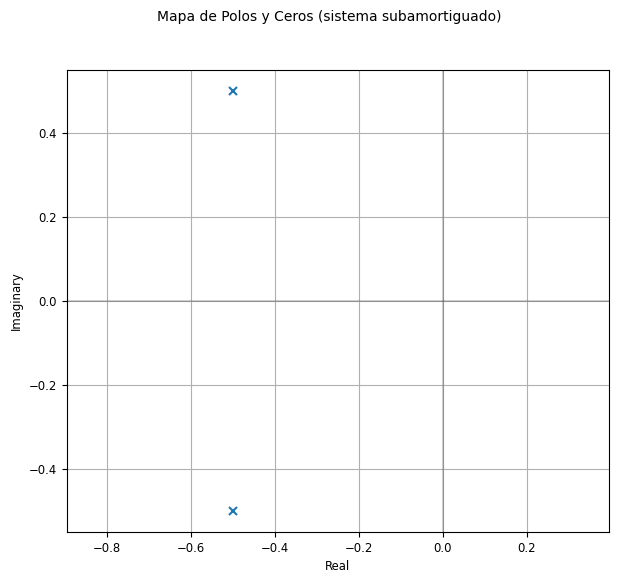

In [11]:
# --- Indicar las raíces de s (Polos del sistema). ---
# Para un sistema subamortiguado, esperamos complejos conjugados con parte real negativa.
# Usamos la función ct.poles() para obtener las raíces del denominador.
polos = ct.poles(sistema_subamortiguado)

# Imprimimos el resultado.
print("Las raíces de s (polos) son:")
print(polos)

# --- Visualización del Mapa de Polos y Ceros ---
plt.figure(figsize=(7, 6))
ct.pzmap(sistema_subamortiguado, title='Mapa de Polos y Ceros (sistema subamortiguado)')
plt.grid(True)
plt.show()

#### Paso 3.c) Graficar la respuesta del sistema.

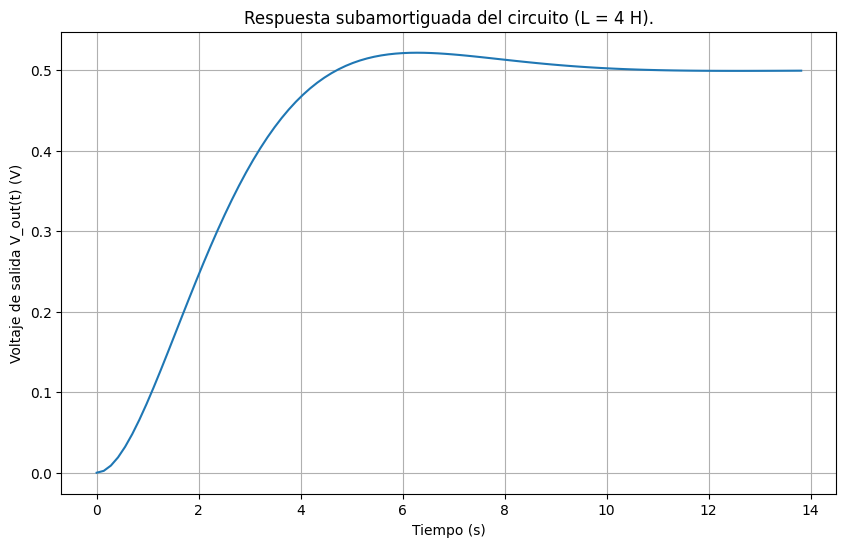

In [12]:
# --- Simulación de la respuesta al escalón unitario. ---
# Calculamos la respuesta del sistema a una entrada de 1 V.
# t es el vector de tiempo y vout_subamortiguado es el vector de la salida V_out(t).
t, vout_subamortiguado = ct.step_response(sistema_subamortiguado)

# --- Graficación de la respuesta. ---
plt.figure(figsize=(10, 6))
plt.plot(t, vout_subamortiguado)
plt.title('Respuesta subamortiguada del circuito (L = 4 H).')
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje de salida V_out(t) (V)')
plt.grid(True)
plt.show()


### Ejercicio: Análisis de la respuesta críticamente amortiguada
1. Determinación del valor de L
Para que el sistema presente una respuesta críticamente amortiguada, los polos deben ser reales e iguales. Esta condición se cumple cuando el discriminante del polinomio característico es igual a cero, es decir, cuando $b^{2}-4ac=0$.
El polinomio característico del circuito es:
$$s^{2}(LCR_{1})+s(L+R_{1}R_{2}C)+(R_{1}+R_{2})=0$$
Sustituyendo los valores $R_{1}=2$, $R_{2}=2$ y $C=1$, se obtiene:
$$
s^{2}(2L)+s(L+4)+4=0$$
De esta forma, se tiene $a=2L$, $b=L+4$ y $c=4$.
Aplicando la condición del discriminante:
$$(L+4)^{2}-4(2L)(4)=0$$

Desarrollando la expresión:
$L^{2} + 8L + 16 - 32L = 0$

$L^{2} - 24L + 16 = 0$

Usando la fórmula general cuadrática para resolver L:

$L = \frac{-(-24) \pm \sqrt{(-24)^{2} - 4(1)(16)}}{2(1)} = \frac{24 \pm \sqrt{576 - 64}}{2} = \frac{24 \pm \sqrt{512}}{2}$

$L = \frac{24 \pm 16\sqrt{2}}{2} = 12 \pm 8\sqrt{2}$

De aquí se obtienen dos valores positivos para L:

$L \approx 23.31 \text{ Hy } L \approx 0.686 \text{ H}.$

Para el análisis posterior, se elige el valor menor:

$L_{\text{crítico}} \approx 0.686 \text{ H}$


--- Caso Críticamente Amortiguado ---
Valor de L = 0.686 H

Función de Transferencia:
<TransferFunction>: sys[15]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

             2
  -----------------------
  1.373 s^2 + 4.686 s + 4

Polos del sistema:
[-1.70710683+0.j -1.70710673+0.j]


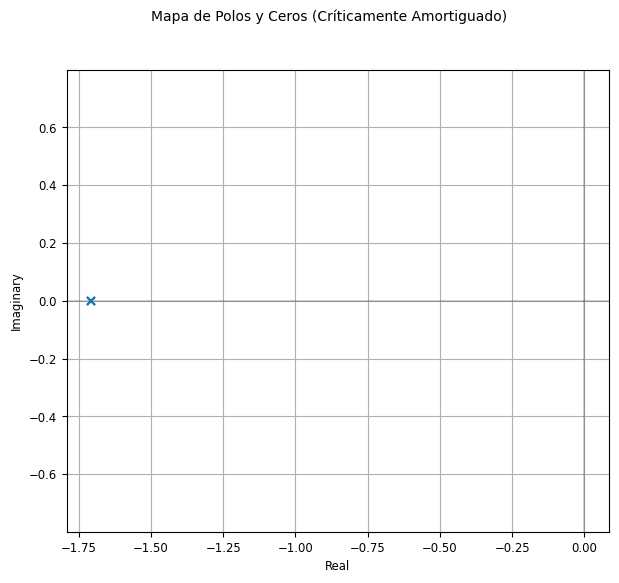

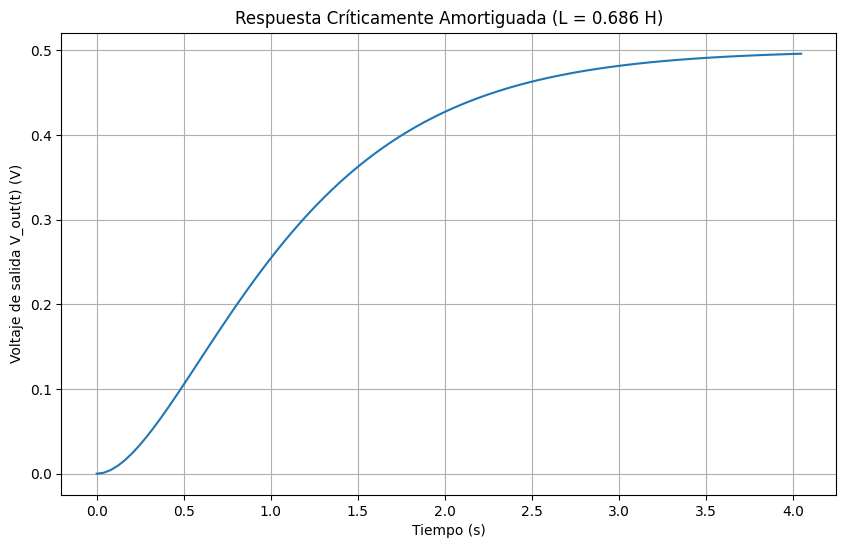

In [13]:
# --- 1. La Simulación de la respuesta CRÍTICAMENTE AMORTIGUADA. ---

# --- Parámetros del circuito cambiamos L. ---
R1 = 2
R2 = 2
# Usamos el valor de L que calculamos para el caso crítico.
L_critico = 12 - 8 * np.sqrt(2) 
C = 1

# --- Obtenemos la nueva Función de Transferencia. ---
num_critico = [R2]
den_critico = [L_critico*C*R1, (L_critico + R1*R2*C), (R1 + R2)]
sistema_critico = ct.tf(num_critico, den_critico)

print("--- Caso Críticamente Amortiguado ---")
print(f"Valor de L = {L_critico:.3f} H")
print("\nFunción de Transferencia:")
print(sistema_critico)

# --- Verificamos los polos (deben ser reales e iguales). ---
polos_critico = ct.poles(sistema_critico)
print("\nPolos del sistema:")
print(polos_critico)

# --- Mapa de Polos y Ceros ---
plt.figure(figsize=(7, 6))
ct.pzmap(sistema_critico, title='Mapa de Polos y Ceros (Críticamente Amortiguado)')
plt.grid(True)
plt.show()

# --- Graficación de la respuesta al escalón. ---
t_critico, vout_critico = ct.step_response(sistema_critico)
plt.figure(figsize=(10, 6))
plt.plot(t_critico, vout_critico)
plt.title(f'Respuesta Críticamente Amortiguada (L = {L_critico:.3f} H)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje de salida V_out(t) (V)')
plt.grid(True)
plt.show()

### Ejercicio: Análisis de la respuesta sobreamortiguada
2. Selección del valor de L y determinación de los polos
Para que el sistema presente una respuesta sobreamortiguada, es necesario que los polos sean reales, distintos y negativos. 

Esta condición se cumple cuando el discriminante del polinomio característico, $b^2 - 4ac$, es mayor que cero. 

Se selecciona un valor de $L = 0.5 \text{ H}$.

El cual es menor que el valor crítico previamente obtenido (0.686 H).

Con los parámetros $R_1 = 2$, $R_2 = 2$, $C = 1$ y $L = 0.5$, el polinomio característico se expresa como:
$$s^2(2L) + s(L + 4) + 4 = 0$$
Sustituyendo los valores:
$$
s^2(2 \cdot 0.5) + s(0.5 + 4) + 4 = 0$$
$$s^2 + 4.5s + 4 = 0$$
Aplicando la fórmula cuadrática para obtener las raíces (polos):
$$
s = \frac{-4.5 \pm \sqrt{(4.5)^2 - 4(1)(4)}}{2(1)} = \frac{-4.5 \pm \sqrt{20.25 - 16}}{2} = \frac{-4.5 \pm \sqrt{4.25}}{2}$$
$$s \approx \frac{-4.5 \pm 2.06}{2}$$
De esta forma, se obtienen dos polos reales, diferentes y negativos:
$$
s_{1} \approx -1.22, s_{2} \approx -3.28$$
Dado que los polos cumplen con las condiciones requeridas, el sistema presenta una respuesta  **sobreamortiguada**.

--- Caso Sobreamortiguado ---
Valor de L = 0.500 H

Funcion de Transferencia:
<TransferFunction>: sys[18]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

         2
  ---------------
  s^2 + 4.5 s + 4

Polos del sistema:
[-3.28077641+0.j -1.21922359+0.j]


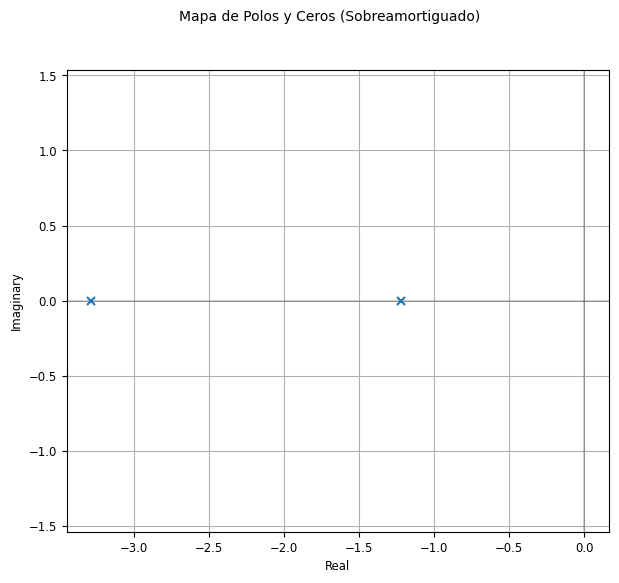

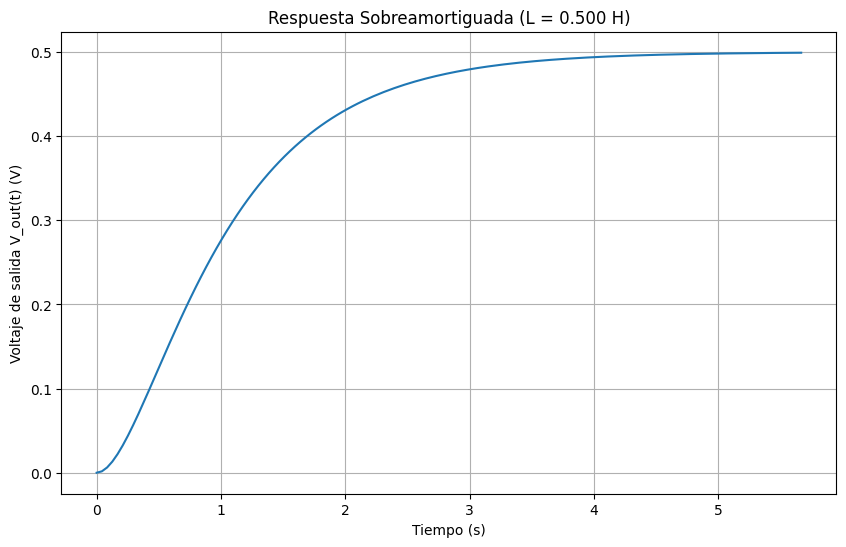

In [14]:
# Simulacion de la respuesta SOBREAMORTIGUADA

# solo cambiamos el valor de L
R1 = 2
R2 = 2
L_sobre = 0.5 
C = 1

# La Nueva Funcion de Transferencia
num_sobre = [R2]
den_sobre = [L_sobre*C*R1, (L_sobre + R1*R2*C), (R1 + R2)]
sistema_sobre = ct.tf(num_sobre, den_sobre)

print("--- Caso Sobreamortiguado ---")
print(f"Valor de L = {L_sobre:.3f} H")
print("\nFuncion de Transferencia:")
print(sistema_sobre)

#Polos
polos_sobre = ct.poles(sistema_sobre)
print("\nPolos del sistema:")
print(polos_sobre)

# Mapa de Polos y Ceros
plt.figure(figsize=(7, 6))
ct.pzmap(sistema_sobre, title='Mapa de Polos y Ceros (Sobreamortiguado)')
plt.grid(True)
plt.show()

# Graficacion de la respuesta al escalon
t_sobre, vout_sobre = ct.step_response(sistema_sobre)
plt.figure(figsize=(10, 6))
plt.plot(t_sobre, vout_sobre)
plt.title(f'Respuesta Sobreamortiguada (L = {L_sobre:.3f} H)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje de salida V_out(t) (V)')
plt.grid(True)
plt.show()

3.  **Gráfica comparativa:**
    

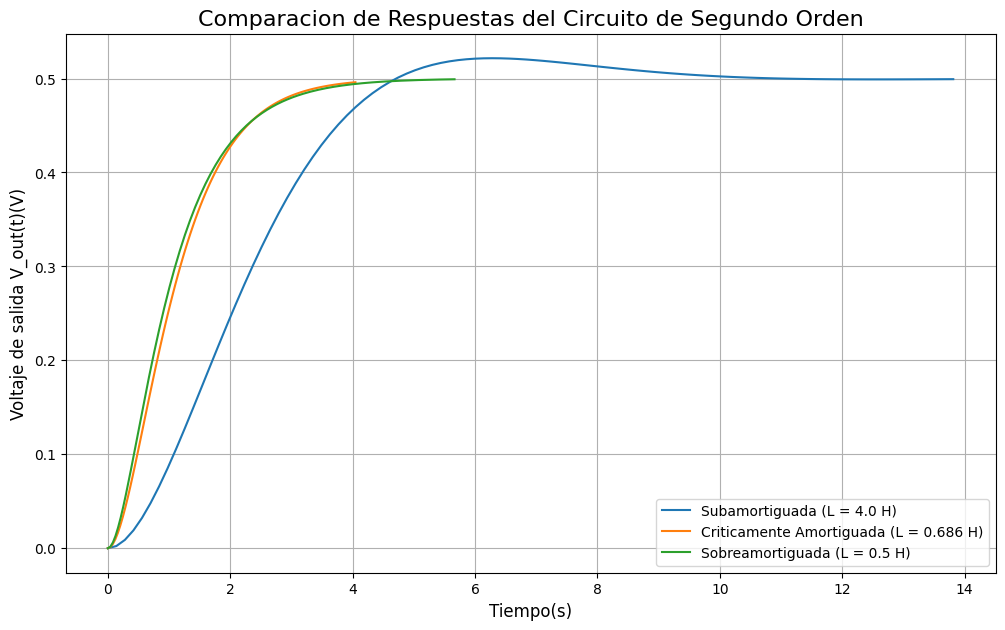

In [15]:
# Comparativa de las 3 Graficas

plt.figure(figsize=(12, 7))

# Grafica de la respuesta subamortiguada (L = 4 H)
plt.plot(t, vout_subamortiguado, label=f'Subamortiguada (L = {L:.1f} H)')

# Grafica de la respuesta criticamente amortiguada (L ≈ 0.686 H)
plt.plot(t_critico, vout_critico, label=f'Criticamente Amortiguada (L = {L_critico:.3f} H)')

# Grafica de la respuesta sobreamortiguada (L = 0.5 H)
plt.plot(t_sobre, vout_sobre, label=f'Sobreamortiguada (L = {L_sobre:.1f} H)')

# Títulos y etiquetas
plt.title('Comparacion de Respuestas del Circuito de Segundo Orden', fontsize=16)
plt.xlabel('Tiempo(s)', fontsize=12)
plt.ylabel('Voltaje de salida V_out(t)(V)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()